In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("50_startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


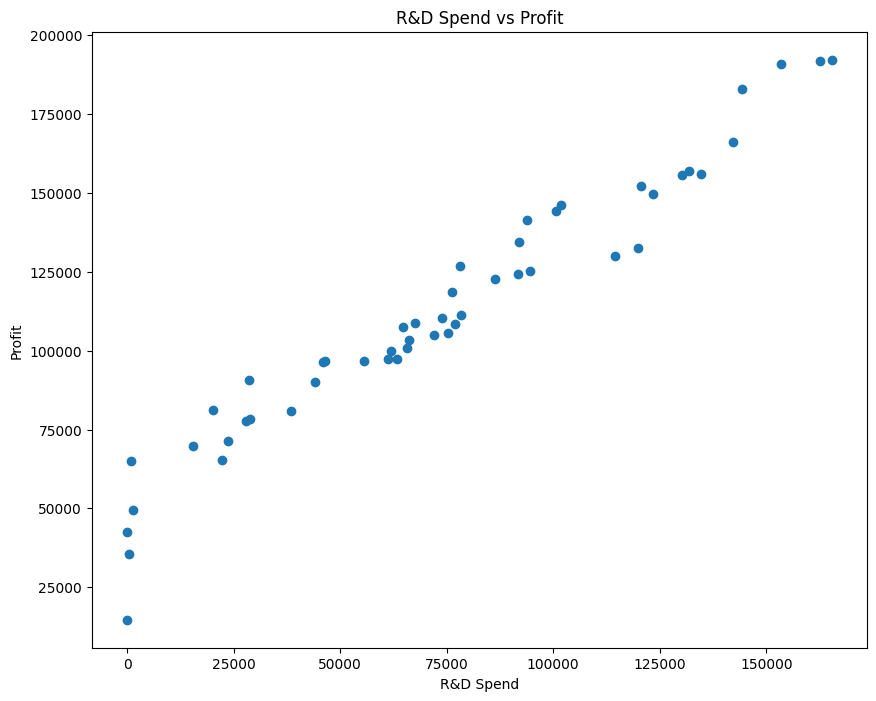

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(x="R&D Spend", y="Profit", data=df)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D Spend vs Profit")
plt.show()

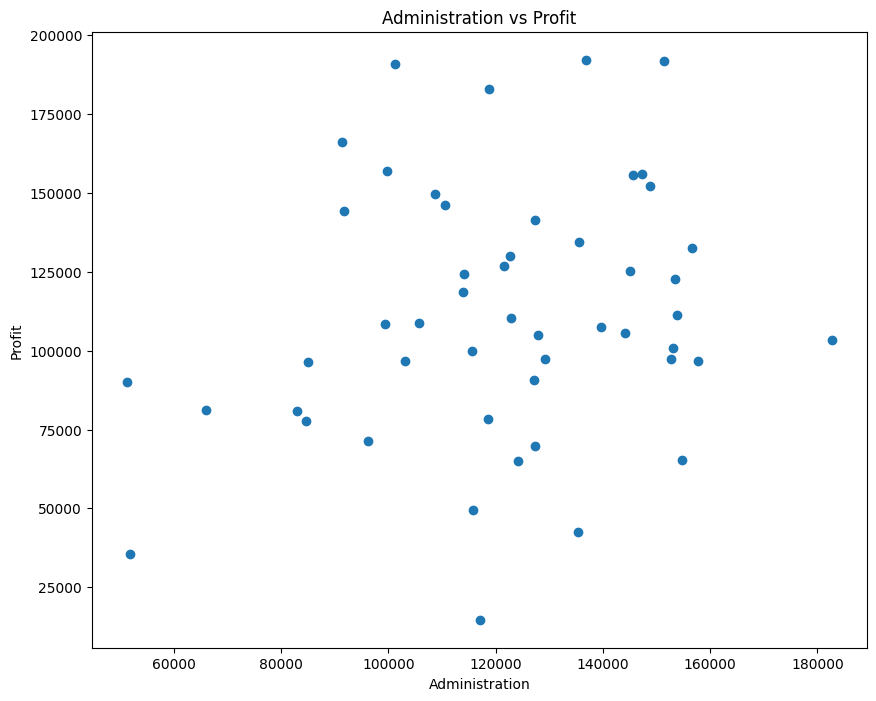

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(x="Administration", y="Profit", data=df)
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.title("Administration vs Profit")
plt.show()

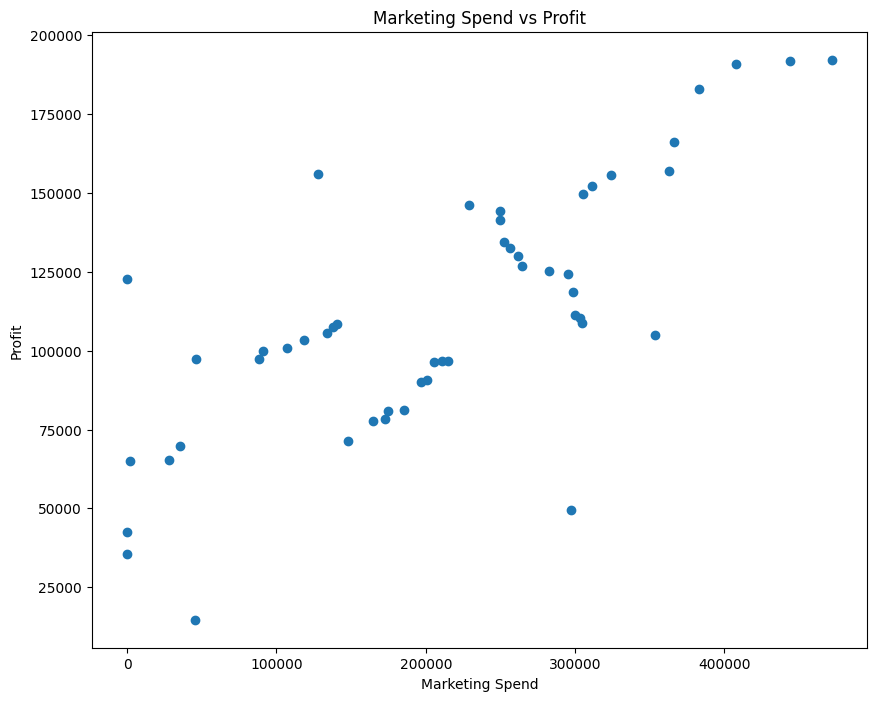

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(x="Marketing Spend", y="Profit", data=df)
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.title("Marketing Spend vs Profit")
plt.show()

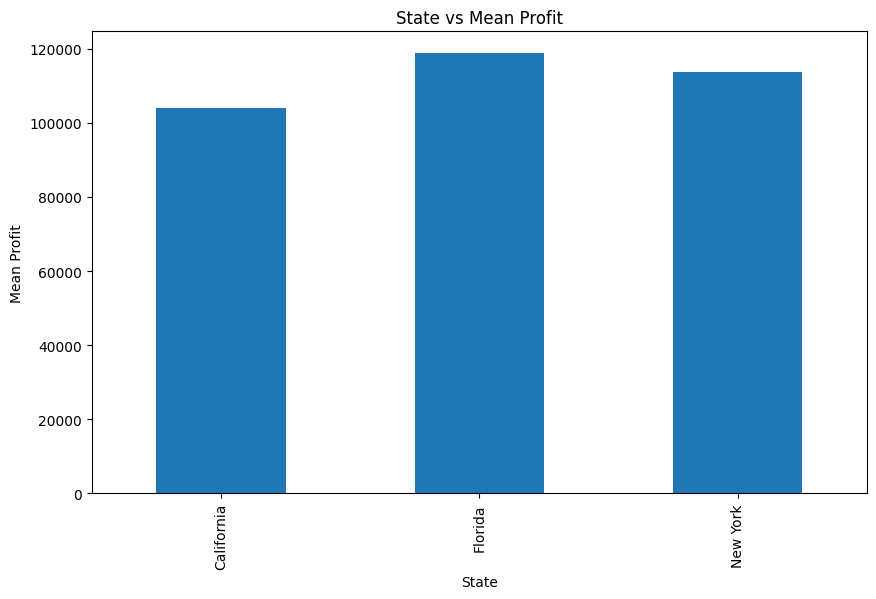

In [7]:
avg_state = df.groupby("State")["Profit"].mean()
plt.figure(figsize=(10,6))
avg_state.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Mean Profit")
plt.title("State vs Mean Profit")
plt.show()

In [38]:
X = df.iloc[:, :-1].values
y = df.loc[:, "Profit"].values

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, regressor.predict(X_test))

83502864.03256945

In [58]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [65]:
predvsact = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1)
predact = pd.DataFrame(predvsact, columns=["Predicted Profit", "Actual Profit"])
predact.head()

,Predicted Profit,Actual Profit
0,103015.201598,103282.38
1,132582.277608,144259.40
2,132447.738452,146121.95
3,71976.098513,77798.83
4,178537.482211,191050.39
